In [1]:
import pandas as pd

df = pd.read_csv('weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [2]:
y = df['weather']
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [3]:
columns_to_drop = ['weather', 'date']

x = df.drop(columns=columns_to_drop, axis=1)
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [4]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [5]:
x_train

,precipitation,temp_max,temp_min,wind
290,0.0,14.4,6.1,1.6
24,8.1,8.9,4.4,5.4
1093,0.0,6.1,0.6,4.3
1288,0.0,26.1,16.7,2.2
374,38.4,10.0,1.7,5.1
...,...,...,...,...
802,0.5,13.9,5.0,2.5
53,0.0,8.3,2.8,3.9
350,22.6,6.7,3.3,5.5
79,3.6,7.8,2.2,6.4


In [6]:
x_test

,precipitation,temp_max,temp_min,wind
1437,54.1,15.6,10.0,6.2
57,0.0,6.7,-2.2,3.0
780,1.0,8.3,3.9,6.0
382,0.0,3.9,-2.8,1.0
1170,1.0,13.9,6.1,3.0
...,...,...,...,...
1033,25.4,15.6,11.1,3.2
977,0.0,23.9,11.1,3.1
661,0.0,12.8,6.1,0.4
914,0.0,21.7,13.9,3.1


In [7]:
y_train

290      sun
24      rain
1093     fog
1288     sun
374     rain
        ... 
802     rain
53       sun
350     snow
79      rain
792     rain
Name: weather, Length: 1168, dtype: object

In [8]:
y_test

1437       rain
57          sun
780        rain
382     drizzle
1170       rain
         ...   
1033       rain
977         fog
661         sun
914         sun
133         sun
Name: weather, Length: 293, dtype: object

In [9]:
from sklearn.ensemble import RandomForestClassifier

random_state = 42

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_rf_train_pred)
test_accuracy = accuracy_score(y_test, y_rf_test_pred)

In [12]:
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9982876712328768
Test Accuracy: 0.8361774744027304


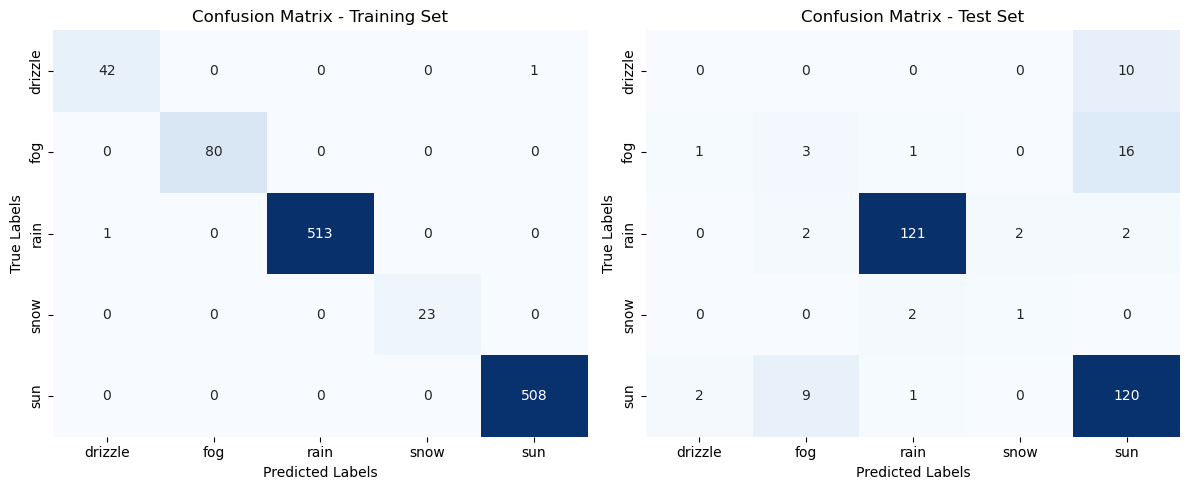

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the training and test sets
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

# Create confusion matrix for training set
cm_train = confusion_matrix(y_train, y_rf_train_pred)

# Create confusion matrix for test set
cm_test = confusion_matrix(y_test, y_rf_test_pred)

# Display the confusion matrices as heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()
